In [116]:
#We are trying to predict if the client left the company in the previous month.
#Therefore we have a binary classification problem with a slightly unbalanced target:

import pandas  as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
Telecom_churn = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
# now that we imported the data lets grab a peek and understand all are columns
Telecom_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Part 1 - understanding and cleaning the data



## Explanation for all columns

**gender**  -     male/female

**SeniorCitizen**   - is the customer a seniorcitizen(old)

**Partner**          -   Whether the customer has a partner or not 

**Dependents**        -  Whether the customer has dependents or not

**tenure**             - Number of months the customer has been with the company

**PhoneService**     -   Whether the customer has a phone service or not (Yes, No)

**MultipleLines**     -  Whether the customer has multiple lines or not (Yes, No, No Phone Service)

**InternetService**   -  Customer’s internet service type (DSL, Fiber Optic, None)

**OnlineSecurity**   -   Whether the customer has Online Security add-on (Yes, No, No Internet Service)

**OnlineBackup**     -   Whether the customer has Online Backup add-on (Yes, No, No Internet Service)

**DeviceProtection**  -  Whether the customer has Device Protection add-on (Yes, No, No Internet Service)

**TechSupport**      -   Whether the customer has Tech Support add-on (Yes, No, No Internet Service)

**StreamingTV**       -  Whether the customer has streaming TV or not (Yes, No, No Internet Service)

**StreamingMovies**   -  Whether the customer has streaming movies or not (Yes, No, No Internet Service)

**Contract**         -   Term of the customer’s contract (Monthly, 1-Year, 2-Year)

**PaperlessBilling**  -  PaperlessBilling — Whether the customer has paperless billing or not (Yes, No)

**PaymentMethod**     -  The customer’s payment method (E-Check, Mailed Check, Bank Transfer (Auto), Credit Card (Auto))

**MonthlyCharges**   -   The monthly amount charged to the customer

**TotalCharges**     -   The total amount charged to the customer

**Churn**           -    Had the Customer  left within the last month 

In [117]:
Telecom_churn.dtypes
#as we can see we have 3 numerical columns and 18 object columns. we will soon deal with this making sure to change all data to numerical

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [118]:
#lets look at what null values we have
Telecom_churn.TotalCharges = pd.to_numeric(Telecom_churn.TotalCharges, errors='coerce')
Telecom_churn.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [119]:
#since its only 11 missing values we will remove them
Telecom_churn = Telecom_churn.dropna()
Telecom_churn.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [120]:
#We can see there is no need for customerID so lets drop that column.
df1 = Telecom_churn.iloc[:,1:]
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Part 2 - vizualization

In [121]:
#My goal in this is project is to predict whether a given client will churn or not , lets focus on that , by understanding and searching for coralation with churn
df1['Churn'].value_counts(sort = False)


Yes    1869
No     5163
Name: Churn, dtype: int64

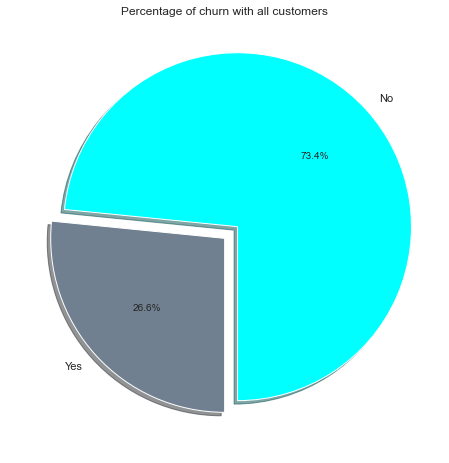

In [122]:
#lets see are main column in a graph using a pie from matplotlyb

labels =df1['Churn'].value_counts(sort = True).index
sizes = df1['Churn'].value_counts(sort = True)

colors = ["aqua" , "slategrey"]

explode = (0.1,0)  # explode 1st slice
rcParams['figure.figsize'] = 8,8

plt.pie(sizes, explode=explode, labels=labels,colors = colors ,
        autopct='%1.1f%%', shadow=True, startangle=270,) #autopct adds percents

plt.title('Percentage of churn with all customers')
plt.show()

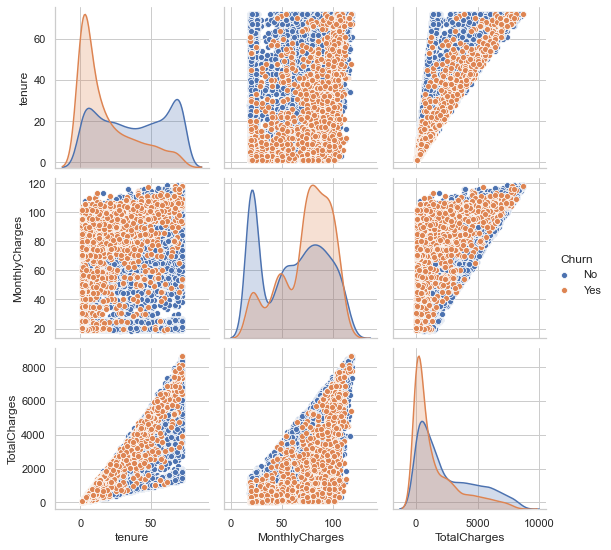

In [123]:
#I want to investigate deeper the 3 columns , with numercial data ,that i understand that have a connection between them and churn.
sns.pairplot(df1,vars = ['tenure','MonthlyCharges','TotalCharges' ], hue="Churn") # hue  = name of variable in data , vars = list of variable names

#as i suspected we can see that People having lower tenure and higher monthly charges are tend to churn more.

In [124]:
#changing churn  to numerical value inorder to use seaborns catplot to find churn probabilty with the type of contract the customer has
#while we are at it ,  we will change aditional values which are the similar(3 optiones)
columns_to_convert = ['Partner', 
                      'Dependents', 
                      'PhoneService', 
                      'MultipleLines',
                      'OnlineSecurity',
                      'OnlineBackup',
                      'DeviceProtection',
                      'TechSupport',
                      'StreamingTV',
                      'StreamingMovies',
                      'PaperlessBilling',
                      'Churn']
for item in columns_to_convert:
    df1[item] = [1 if each == "Yes" else 0 if each == "No" else -1 for each in df1[item]]

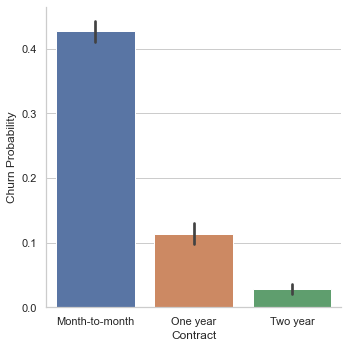

In [125]:
#lets if the type of contract the customer has affects his churn probability
sns.set(style="whitegrid")
g1=sns.catplot(x="Contract", y="Churn", data=df1,kind="bar")
g1.set_ylabels("Churn Probability")
#as we can see if the customer is on a month to month contract he is more likley to churn

In [126]:
df1.info()
#we have 3 values left that are not numerical so lets change them to dummy values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   int64  
 3   Dependents        7032 non-null   int64  
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   int64  
 6   MultipleLines     7032 non-null   int64  
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   int64  
 9   OnlineBackup      7032 non-null   int64  
 10  DeviceProtection  7032 non-null   int64  
 11  TechSupport       7032 non-null   int64  
 12  StreamingTV       7032 non-null   int64  
 13  StreamingMovies   7032 non-null   int64  
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   int64  
 16  PaymentMethod     7032 non-null   object 


In [127]:
df_dummies =  pd.get_dummies(data=df1)
df_dummies.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,-1,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,34,1,0,1,0,1,0,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,2,1,0,1,1,0,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,45,0,-1,1,0,1,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,2,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [129]:
#now that all  values are numerical lets check the coralation between all catagories to churn 
df_dummies.corr()['Churn'].sort_values()
#we knew already that tenure,Type of contract , and payments are very much related to the probabilty of a customer leaving 
#however we see new related values - Type of internt service and PaymentMethod_Electronic check.

tenure                                    -0.354049
Contract_Two year                         -0.301552
InternetService_No                        -0.227578
TotalCharges                              -0.199484
Contract_One year                         -0.178225
Dependents                                -0.163128
Partner                                   -0.149982
PaymentMethod_Credit card (automatic)     -0.134687
InternetService_DSL                       -0.124141
PaymentMethod_Bank transfer (automatic)   -0.118136
PaymentMethod_Mailed check                -0.090773
gender_Male                               -0.008545
gender_Female                              0.008545
PhoneService                               0.011691
OnlineSecurity                             0.023014
TechSupport                                0.026744
MultipleLines                              0.036148
OnlineBackup                               0.073934
DeviceProtection                           0.084402
SeniorCitize

## Part 3 Model